# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [6]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
# Criar uma coluna indicando se 'munResLat' está acima ou abaixo de -10.5
sinasc_raw['lat_maior_que_-10.5'] = sinasc_raw['munResLat'] >= -10.5

# Agrupar pela nova coluna e descrever os dados
sinasc_raw.groupby('lat_maior_que_-10.5')["CONSULTAS"].describe()


,count,mean,std,min,25%,50%,75%,max
lat_maior_que_-10.5,,,,,,,,
False,12994.0,3.694090,0.643781,1.0,4.0,4.0,4.0,9.0
True,14034.0,3.467436,0.888240,1.0,3.0,4.0,4.0,9.0


In [10]:
# Criar uma coluna indicando se 'munResLat' está acima ou abaixo de -10.5
sinasc_raw['lat_maior_que_-10.5'] = sinasc_raw['munResLat'] >= -10.5

# Agrupar pela nova coluna e descrever os dados
sinasc_raw.groupby('lat_maior_que_-10.5')["QTDFILMORT"].describe()

,count,mean,std,min,25%,50%,75%,max
lat_maior_que_-10.5,,,,,,,,
False,12804.0,0.24258,0.599444,0.0,0.0,0.0,0.0,28.0
True,12126.0,0.29177,0.627856,0.0,0.0,0.0,0.0,9.0


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [12]:
# Criar uma coluna indicando se 'munResArea' está acima ou abaixo de -10.5
sinasc_raw["area_maior_que_3000"] = sinasc_raw["munResArea"] >= 3000

# Agrupar pela nova coluna e descrever os dados
sinasc_raw.groupby("area_maior_que_3000")["QTDGESTANT"].describe()

,count,mean,std,min,25%,50%,75%,max
area_maior_que_3000,,,,,,,,
False,5176.0,1.134467,1.208857,0.0,0.0,1.0,2.0,9.0
True,20640.0,1.310368,1.447429,0.0,0.0,1.0,2.0,52.0


In [13]:
# Criar uma coluna indicando se 'munResArea' está acima ou abaixo de 3000
sinasc_raw["area_maior_que_3000"] = sinasc_raw["munResArea"] >= 3000

# Agrupar pela nova coluna e descrever os dados
sinasc_raw.groupby("area_maior_que_3000")["APGAR1"].describe()

,count,mean,std,min,25%,50%,75%,max
area_maior_que_3000,,,,,,,,
False,5212.0,8.073484,1.008775,0.0,8.0,8.0,9.0,10.0
True,21720.0,8.152808,0.978517,0.0,8.0,8.0,9.0,10.0


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [15]:
sinasc_raw["munResAlt"].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [16]:
# Criar uma coluna indicando se 'munResAlt' está acima ou abaixo de 153
sinasc_raw["alt_maior_que_153"] = sinasc_raw["munResAlt"] >= 153

# Agrupar pela nova coluna e descrever os dados
sinasc_raw.groupby("alt_maior_que_153")["IDANOMAL"].describe()

,count,mean,std,min,25%,50%,75%,max
alt_maior_que_153,,,,,,,,
False,12483.0,2.047344,0.638772,1.0,2.0,2.0,2.0,9.0
True,13954.0,2.014548,0.392180,1.0,2.0,2.0,2.0,9.0


In [17]:
# Criar uma coluna indicando se 'munResAlt' está acima ou abaixo de 153
sinasc_raw["alt_maior_que_153"] = sinasc_raw["munResAlt"] >= 153

# Agrupar pela nova coluna e descrever os dados
sinasc_raw.groupby("alt_maior_que_153")["RACACORMAE"].describe()

,count,mean,std,min,25%,50%,75%,max
alt_maior_que_153,,,,,,,,
False,12640.0,3.565190,1.064882,1.0,4.0,4.0,4.0,5.0
True,13727.0,3.119618,1.351617,1.0,1.0,4.0,4.0,5.0


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [19]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

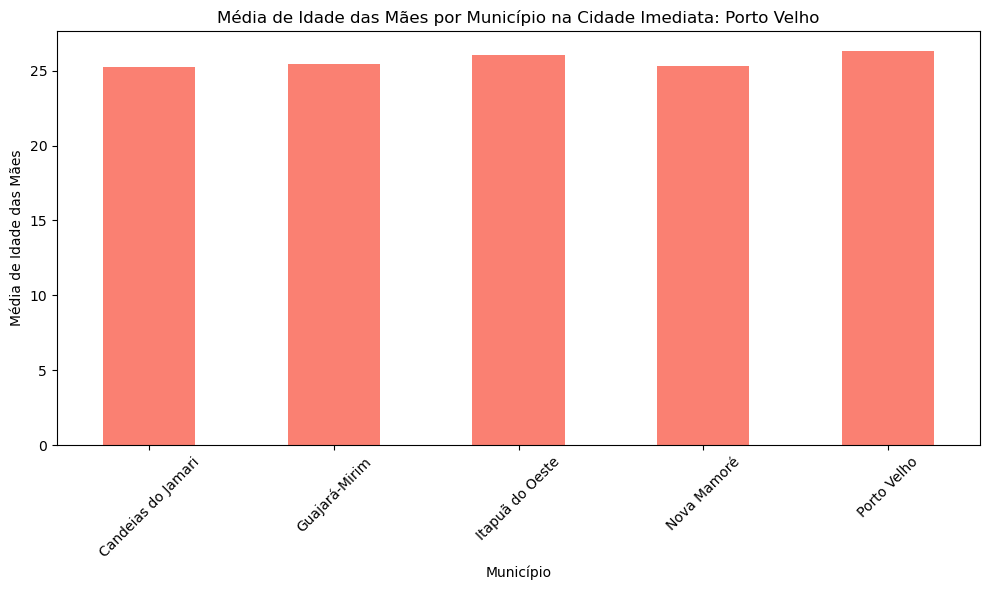

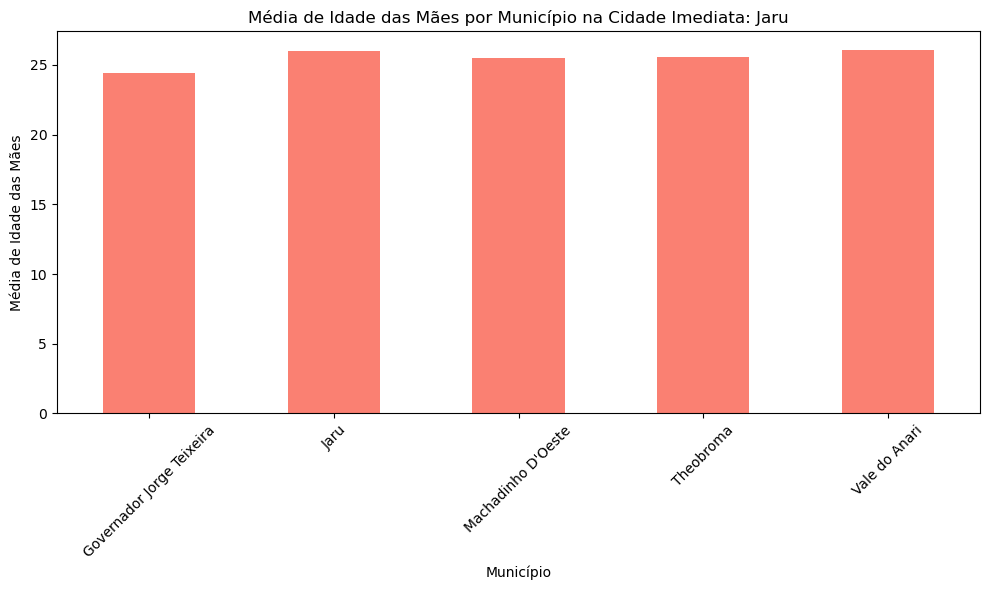

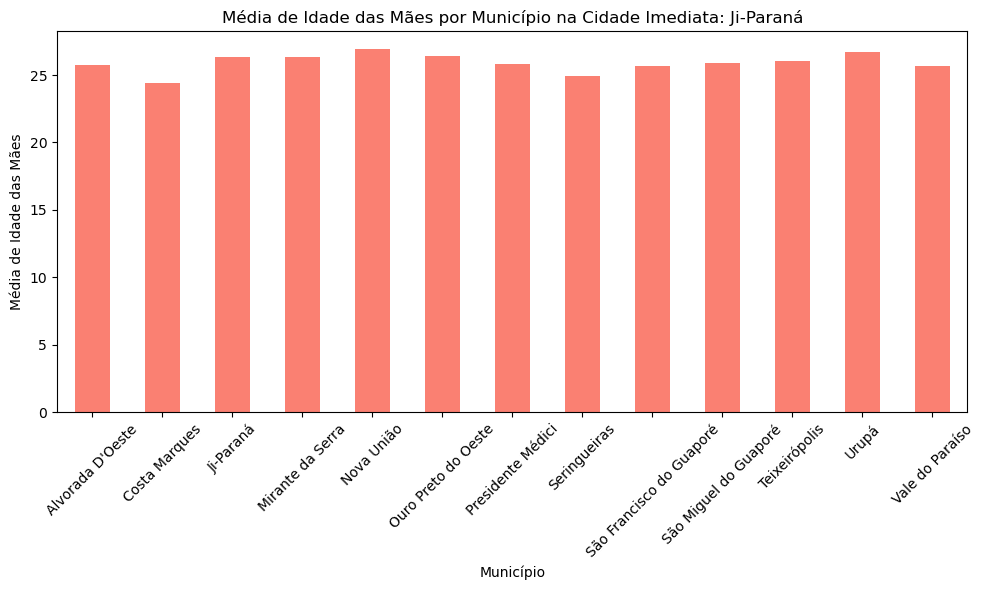

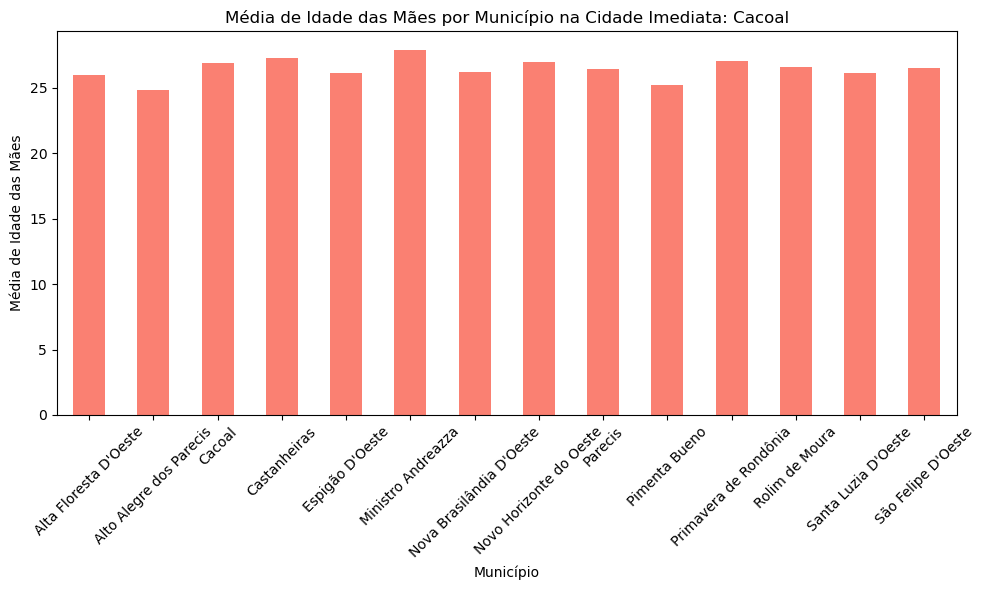

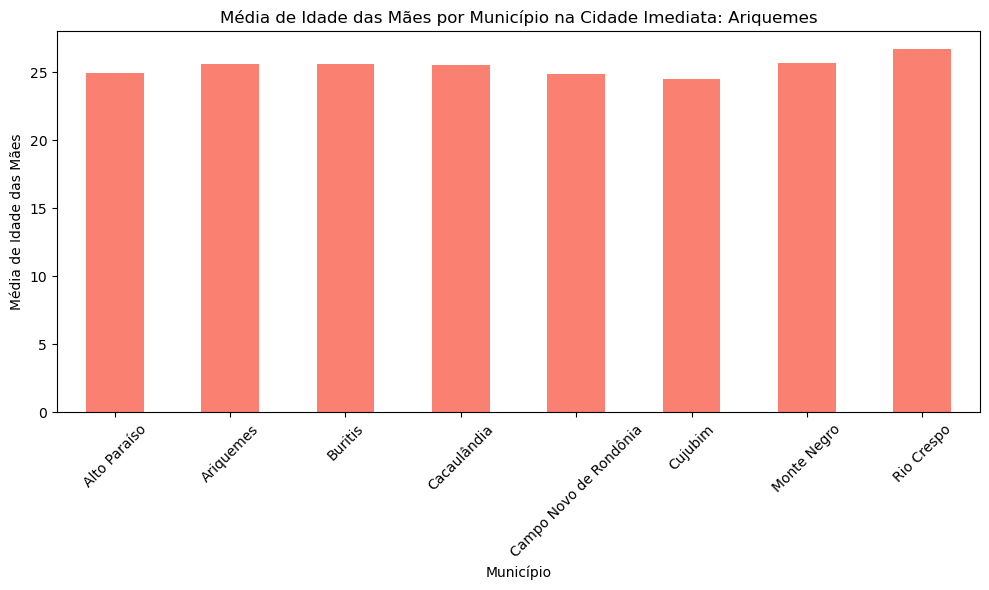

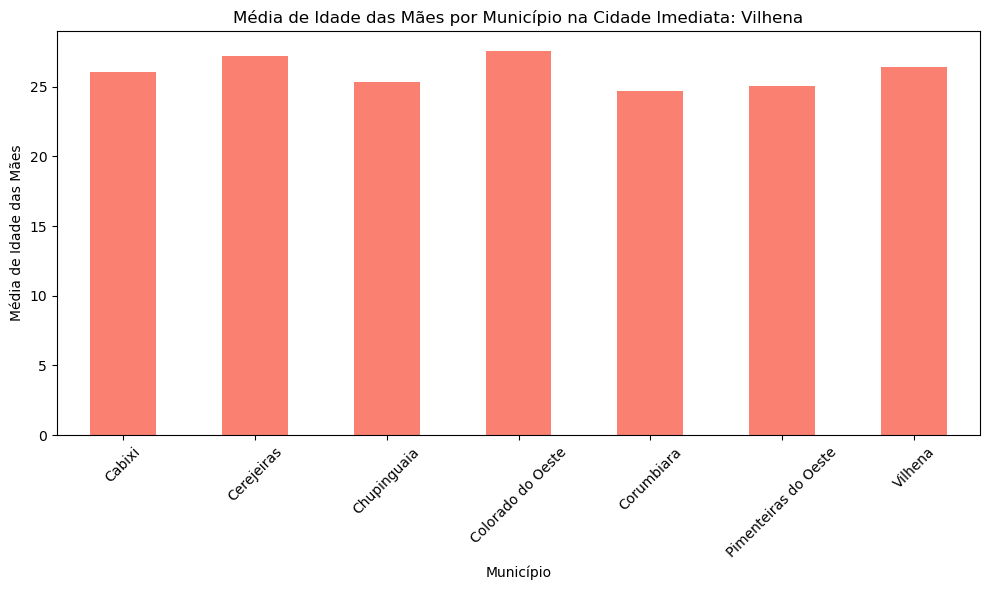

In [20]:
# Calcular e plotar a média de idade da mãe por cidade imediata.
for cidade_imediata in set(imediatas.values()):

    municipios = [regiao for regiao, cidade in imediatas.items() if cidade == cidade_imediata]
    
    # Filtrar o DataFrame para os municípios da cidade imediata.
    dados_filtrados = sinasc_raw[sinasc_raw["munResNome"].isin(municipios)]
    
    # Calcular a média de idade da mãe por município.
    media_idade_mae_por_municipio = dados_filtrados.groupby("munResNome")["IDADEMAE"].mean()
    
    # Plotar o gráfico de barras.
    plt.figure(figsize=(10, 6))
    media_idade_mae_por_municipio.plot(kind="bar", color="salmon")
    plt.title(f"Média de Idade das Mães por Município na Cidade Imediata: {cidade_imediata}")
    plt.xlabel("Município")
    plt.ylabel("Média de Idade das Mães")
    plt.xticks(rotation=45)
    plt.tight_layout()  
    
    # Exibir o gráfico
    plt.show()

In [21]:
sinasc_2 = sinasc_raw[["munResNome","IDADEMAE","IDADEPAI", "APGAR5",  "PESO", "QTDFILMORT"]]
sinasc_2.head()

,munResNome,IDADEMAE,IDADEPAI,APGAR5,PESO,QTDFILMORT
0,Alta Floresta D'Oeste,19,26.0,10.0,3685,0.0
1,Alta Floresta D'Oeste,29,24.0,9.0,3055,0.0
2,Alta Floresta D'Oeste,37,32.0,10.0,3460,0.0
3,Alto Alegre dos Parecis,30,24.0,10.0,2982,0.0
4,Alta Floresta D'Oeste,30,27.0,10.0,3310,0.0


In [22]:
 sinasc_2 = sinasc_2.set_index('munResNome')

In [23]:
media_idade_mae_por_região = sinasc_2.groupby(imediatas).mean()
    


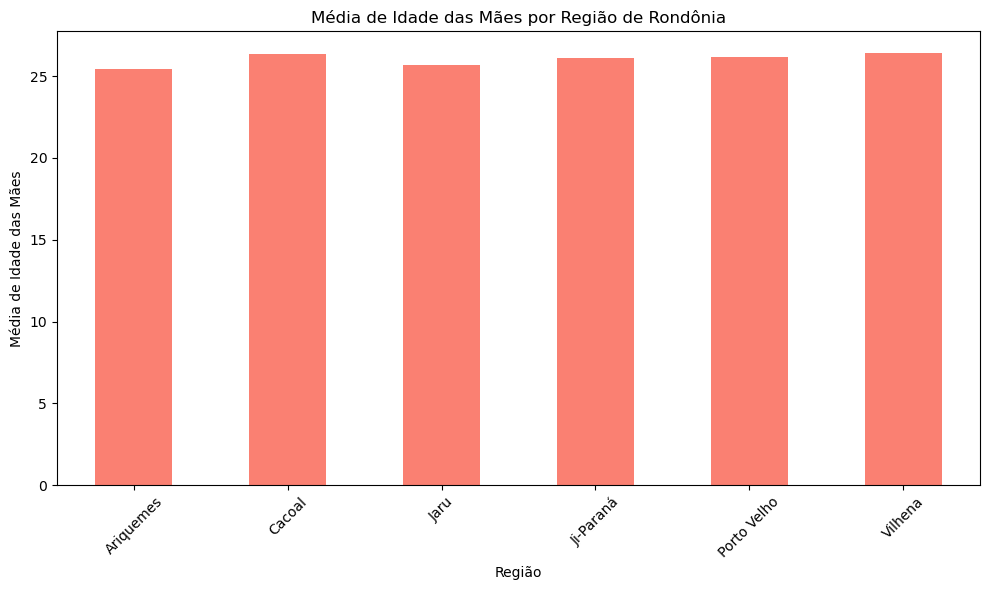

In [24]:
# Plotar o gráfico de barras.
plt.figure(figsize=(10, 6))
media_idade_mae_por_região["IDADEMAE"].plot(kind="bar", color="salmon")
plt.title(f"Média de Idade das Mães por Região de Rondônia")
plt.xlabel("Região")
plt.ylabel("Média de Idade das Mães")
plt.xticks(rotation=45)
plt.tight_layout()  

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M

"O Índice de Desenvolvimento Humano varia de 0 até 1, e nesta lista é dividido em cinco categorias: IDH muito alto (0,800 – 1,000), IDH alto (0,700 – 0,799), IDH médio (0,600 0,699), IDH baixo (0,500 – 0,599) e IDH muito baixo (0,000 – 0,499)."


In [27]:
idh_ro_categorizado = {
    "Porto Velho": "Alto",
    "Vilhena": "Alto",
    "Cacoal": "Alto",
    "Ji-Paraná": "Alto",
    "Pimenta Bueno": "Alto",
    "Ariquemes": "Alto",
    "Rolim de Moura": "Alto",
    "Cerejeiras": "Médio",
    "Jaru": "Médio",
    "Colorado do Oeste": "Médio",
    "Ouro Preto do Oeste": "Médio",
    "Espigão d'Oeste": "Médio",
    "Santa Luzia d'Oeste": "Médio",
    "Pimenteiras do Oeste": "Médio",
    "Presidente Médici": "Médio",
    "Castanheiras": "Médio",
    "Guajará-Mirim": "Médio",
    "Chupinguaia": "Médio",
    "Cabixi": "Médio",
    "Candeias do Jamari": "Médio",
    "São Felipe d'Oeste": "Médio",
    "Cacaulândia": "Médio",
    "São Miguel do Guaporé": "Médio",
    "Mirante da Serra": "Médio",
    "Alvorada d'Oeste": "Médio",
    "Teixeirópolis": "Médio",
    "Nova Brasilândia d'Oeste": "Médio",
    "Rio Crespo": "Médio",
    "Primavera de Rondônia": "Médio",
    "Alta Floresta d'Oeste": "Médio",
    "Ministro Andreazza": "Médio",
    "Novo Horizonte do Oeste": "Médio",
    "Vale do Paraíso": "Médio",
    "Alto Paraíso": "Médio",
    "Parecis": "Médio",
    "Buritis": "Médio",
    "Itapuã do Oeste": "Médio",
    "Corumbiara": "Médio",
    "Cujubim": "Médio",
    "Costa Marques": "Médio",
    "São Francisco do Guaporé": "Médio",
    "Urupá": "Médio",
    "Monte Negro": "Médio",
    "Seringueiras": "Baixo",
    "Governador Jorge Teixeira": "Baixo",
    "Machadinho d'Oeste": "Baixo",
    "Campo Novo de Rondônia": "Baixo",
    "Alto Alegre dos Parecis": "Baixo",
    "Theobroma": "Baixo",
    "Nova União": "Baixo",
    "Nova Mamoré": "Baixo",
    "Vale do Anari": "Baixo"
}

In [29]:
sinasc_2.groupby(idh_ro_categorizado).mean()


,IDADEMAE,IDADEPAI,APGAR5,PESO,QTDFILMORT
munResNome,,,,,
Alto,26.280332,31.074091,9.171668,3245.623791,0.272297
Baixo,25.269231,30.402332,9.267925,3244.309955,0.253521
Médio,25.848191,31.570029,9.225567,3245.670333,0.272386


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [33]:
ifdm_categorizado = {
    "Ariquemes": "IFDM alto",
    "Vilhena": "IFDM alto",
    "Pimenta Bueno": "IFDM alto",
    "Porto Velho": "IFDM alto",
    "Ji-Paraná": "IFDM alto",
    "Cacoal": "IFDM alto",
    "Santa Luzia d'Oeste": "IFDM médio",
    "Rolim de Moura": "IFDM médio",
    "Chupinguaia": "IFDM médio",
    "São Miguel do Guaporé": "IFDM médio",
    "Pimenteiras do Oeste": "IFDM médio",
    "Teixeirópolis": "IFDM médio",
    "Colorado do Oeste": "IFDM médio",
    "Jaru": "IFDM médio",
    "Rio Crespo": "IFDM médio",
    "Primavera de Rondônia": "IFDM médio",
    "Alta Floresta d'Oeste": "IFDM médio",
    "Ouro Preto do Oeste": "IFDM médio",
    "São Francisco do Guaporé": "IFDM médio",
    "Candeias do Jamari": "IFDM médio",
    "São Felipe d'Oeste": "IFDM médio",
    "Presidente Médici": "IFDM médio",
    "Cerejeiras": "IFDM médio",
    "Monte Negro": "IFDM médio",
    "Urupá": "IFDM médio",
    "Espigão d'Oeste": "IFDM médio",
    "Seringueiras": "IFDM médio",
    "Alvorada d'Oeste": "IFDM médio",
    "Itapuã do Oeste": "IFDM médio",
    "Cabixi": "IFDM médio",
    "Novo Horizonte do Oeste": "IFDM médio",
    "Nova Brasilândia d'Oeste": "IFDM médio",
    "Vale do Paraíso": "IFDM médio",
    "Corumbiara": "IFDM médio",
    "Alto Paraíso": "IFDM médio",
    "Cacaulândia": "IFDM médio",
    "Vale do Anari": "IFDM médio",
    "Ministro Andreazza": "IFDM médio",
    "Costa Marques": "IFDM médio",
    "Nova União": "IFDM médio",
    "Guajará-Mirim": "IFDM médio",
    "Mirante da Serra": "IFDM médio",
    "Parecis": "IFDM médio",
    "Castanheiras": "IFDM médio",
    "Theobroma": "IFDM médio",
    "Machadinho d'Oeste": "IFDM médio",
    "Campo Novo de Rondônia": "IFDM médio",
    "Nova Mamoré": "IFDM baixo",
    "Cujubim": "IFDM baixo",
    "Alto Alegre dos Parecis": "IFDM baixo",
    "Governador Jorge Teixeira": "IFDM muito baixo"
}

In [34]:
sinasc_2.groupby(ifdm_categorizado).mean()

,IDADEMAE,IDADEPAI,APGAR5,PESO,QTDFILMORT
munResNome,,,,,
IFDM alto,26.261678,31.236319,9.176015,3246.914553,0.273072
IFDM baixo,25.013906,29.836066,9.265823,3262.537295,0.275956
IFDM muito baixo,24.401786,29.222222,9.089286,3238.991071,0.185185
IFDM médio,25.968086,31.184795,9.177941,3242.310668,0.258635


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [36]:
pib_categorizado = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 500 milhões",
    "Vilhena": "Acima de 500 milhões",
    "Ariquemes": "Acima de 500 milhões",
    "Cacoal": "Acima de 300 milhões",
    "Jaru": "Acima de 200 milhões",
    "Rolim de Moura": "Acima de 200 milhões",
    "Pimenta Bueno": "Acima de 200 milhões",
    "Guajará-Mirim": "Acima de 100 milhões",
    "Ouro Preto do Oeste": "Acima de 100 milhões",
    "Buritis": "Até 100 milhões",
    "Machadinho do Oeste": "Até 100 milhões",
    "Espigão d'Oeste": "Até 100 milhões",
    "São Miguel do Guaporé": "Até 100 milhões",
    "Candeias do Jamari": "Até 100 milhões",
    "Nova Mamoré": "Até 100 milhões",
    "Cerejeiras": "Até 100 milhões",
    "Alta Floresta do Oeste": "Até 100 milhões",
    "Presidente Médici": "Até 100 milhões",
    "Cujubim": "Até 100 milhões",
    "Nova Brasilândia do Oeste": "Até 100 milhões",
    "Alto Paraíso": "Até 100 milhões",
    "São Francisco do Guaporé": "Até 100 milhões",
    "Colorado do Oeste": "Até 100 milhões",
    "Monte Negro": "Até 100 milhões",
    "Alto Alegre dos Parecis": "Até 100 milhões",
    "Campo Novo de Rondônia": "Até 100 milhões",
    "Alvorada do Oeste": "Até 100 milhões",
    "Chupinguaia": "Até 100 milhões",
    "Corumbiara": "Até 100 milhões",
    "Ministro Andreazza": "Até 100 milhões",
    "Urupá": "Até 100 milhões",
    "Costa Marques": "Até 100 milhões",
    "Seringueiras": "Até 100 milhões",
    "Mirante da Serra": "Até 100 milhões",
    "Governador Jorge Teixeira": "Até 100 milhões",
    "Theobroma": "Até 100 milhões",
    "Santa Luzia do Oeste": "Até 100 milhões",
    "Novo Horizonte do Oeste": "Até 100 milhões",
    "Itapuã do Oeste": "Até 100 milhões",
    "Vale do Paraíso": "Até 100 milhões",
    "Cacaulândia": "Até 100 milhões",
    "Cabixi": "Até 100 milhões",
    "Vale do Anari": "Até 100 milhões",
    "Nova União": "Até 100 milhões",
    "Parecis": "Até 100 milhões",
    "Rio Crespo": "Até 100 milhões",
    "Pimenteiras do Oeste": "Até 100 milhões",
    "Teixeirópolis": "Até 100 milhões",
    "São Felipe do Oeste": "Até 100 milhões",
    "Castanheiras": "Até 100 milhões",
    "Primavera de Rondônia": "Até 100 milhões"
}


In [37]:
sinasc_2.groupby(pib_categorizado).mean()

,IDADEMAE,IDADEPAI,APGAR5,PESO,QTDFILMORT
munResNome,,,,,
Acima de 1 bilhão,26.312670,32.352679,9.212284,3242.820078,0.309770
Acima de 100 milhões,25.870397,31.200000,9.270057,3263.484419,0.295683
Acima de 200 milhões,26.020215,30.321739,9.073875,3263.988449,0.236842
Acima de 300 milhões,26.890102,30.931854,9.185725,3249.720524,0.246896
Acima de 500 milhões,26.145428,31.569206,9.131780,3245.940920,0.239524
Até 100 milhões,25.693757,31.346701,9.248818,3236.390375,0.268389


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

# insights

"É evidente que, quanto mais rica a cidade, maior a idade média dos pais e menor o índice APGAR5. Embora essas diferenças não sejam muito significativas, uma constatação que me surpreendeu foi que o peso das crianças quase não varia entre as categorias que definimos. Eu imaginava que os municípios com menor desenvolvimento ou riqueza teriam um peso médio menor para os recém-nascidos, como observamos na tarefa anterior, onde famílias com diferentes níveis de escolaridade apresentam médias de peso distintas para as crianças."

